<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/05_Word_and_Document_Frequency_and_N_Grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

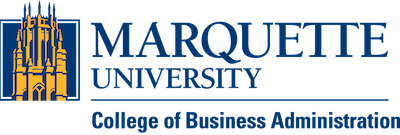

#BUAN4060: Unstructured Data Analytics

##05 Word and Document Frequency and N-Grams

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



##1. Introduction

This is a demonstration how various R packages can be used for text mining in R. In particular, we start with common text transformations, perform various data explorations with term frequency (tf) and inverse document frequency (idf) and build a supervised classification model that learns the difference between texts of different authors

In [1]:
install.packages("gutenbergr") # used to access and retrieve books and texts from Project Gutenberg, a digital library of public domain books
install.packages("stringr") # provides various functions for string manipulation, searching, and extraction

library(gutenbergr)
library(stringr)

doyle <- gutenberg_works(str_detect(author, "Doyle")) # used to retrieve information about works (books) available on Project Gutenberg
# used to retrieve information about works (books) available on Project Gutenberg
head(doyle,n=20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘lazyeval’, ‘urltools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
108,The Return of Sherlock Holmes,"Doyle, Arthur Conan",69,en,Detective Fiction,Public domain in the USA.,TRUE
126,The Poison Belt,"Doyle, Arthur Conan",69,en,Science Fiction,Public domain in the USA.,TRUE
139,The Lost World,"Doyle, Arthur Conan",69,en,Science Fiction,Public domain in the USA.,TRUE
244,A Study in Scarlet,"Doyle, Arthur Conan",69,en,Detective Fiction,Public domain in the USA.,TRUE
290,"The Stark Munro Letters Being series of twelve letters written by J. Stark Munro, M.B., to his friend and former fellow-student, Herbert Swanborough, of Lowell, Massachusetts, during the years 1881-1884","Doyle, Arthur Conan",69,en,,Public domain in the USA.,TRUE
294,"The Captain of the Polestar, and Other Tales","Doyle, Arthur Conan",69,en,,Public domain in the USA.,TRUE
355,The Parasite: A Story,"Doyle, Arthur Conan",69,en,,Public domain in the USA.,TRUE
356,Beyond the City,"Doyle, Arthur Conan",69,en,,Public domain in the USA.,TRUE
423,Round the Red Lamp: Being Facts and Fancies of Medical Life,"Doyle, Arthur Conan",69,en,,Public domain in the USA.,TRUE


Let's obtain “Relativity: The Special and General Theory” by Albert Einstein (gutenberg_id: 30155) and “Experiments with Alternate Currents of High Potential and High Frequency” by Nikola Tesla (gutenberg_id: 13476) from gutenberg and add the column “author” to the result.

In [2]:
library(gutenbergr)

books <- gutenberg_download(gutenberg_id = c(30155, 13476), meta_fields = "author","http://mirrors.xmission.com/gutenberg/")
# used to download books from Project Gutenberg
head(books,n=20)

gutenberg_id,text,author
<int>,<chr>,<chr>
13476,EXPERIMENTS WITH ALTERNATE CURRENTS OF HIGH POTENTIAL AND HIGH FREQUENCY,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,"A Lecture Delivered before the Institution of Electrical Engineers, London","Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,by,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,NIKOLA TESLA,"Tesla, Nikola"
13476,,"Tesla, Nikola"
13476,With a Portrait and Biographical Sketch of the Author,"Tesla, Nikola"


Furthermore, we can transfrom the data to a tibble (tibbles are a modern take on data frames), add the row number with the column name document to the tibble and drop the column gutenberg_id

We will use the information in column document to train a model that can take an individual line (row) and give us a probability that the text in this particular line comes from a certain author

In [3]:
install.packages("dplyr")
library(dplyr)

books <- as_tibble(books) %>%
  # Tibbles are a modern version of data frames, and they provide some advantages for data manipulation and analysis
  mutate(document = row_number()) %>%
    # assign a unique identifier to each row of the tibble using the row_number() function, representing each document or record in the tibble
  select(-gutenberg_id)
  # The gutenberg_id column is removed from the tibble using the select() function with the - sign in front of the column name
  # This column is no longer needed since each document is uniquely identified by the document column

head(books,n=20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




text,author,document
<chr>,<chr>,<int>
EXPERIMENTS WITH ALTERNATE CURRENTS OF HIGH POTENTIAL AND HIGH FREQUENCY,"Tesla, Nikola",1
,"Tesla, Nikola",2
"A Lecture Delivered before the Institution of Electrical Engineers, London","Tesla, Nikola",3
,"Tesla, Nikola",4
by,"Tesla, Nikola",5
,"Tesla, Nikola",6
NIKOLA TESLA,"Tesla, Nikola",7
,"Tesla, Nikola",8
With a Portrait and Biographical Sketch of the Author,"Tesla, Nikola",9


##2. Data transformation

###2.1 Tokenization

First of all, we need to both break the text into individual tokens (a process called tokenization) and transform it to a tidy data structure (i.e. each variable must have its own column, each observation must have its own row and each value must have its own cell)

To do this, we use tidytext’s unnest_tokens() function. We also remove the rarest words in that step, keeping only words in our dataset that occur more than 10 times

In [4]:
install.packages("tidytext")

library(dplyr)
library(tidytext)

tidy_books <- books %>%
  unnest_tokens(word, text) %>% # Tokenize the text in the text column of the books tibble, breaking it into individual words
  group_by(word) %>%
  filter(n() > 10) %>%
  ungroup() # Remove the grouping, so the data is no longer grouped by words
head(tidy_books,n=20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’




author,document,word
<chr>,<int>,<chr>
"Tesla, Nikola",1,experiments
"Tesla, Nikola",1,with
"Tesla, Nikola",1,alternate
"Tesla, Nikola",1,currents
"Tesla, Nikola",1,of
"Tesla, Nikola",1,high
"Tesla, Nikola",1,potential
"Tesla, Nikola",1,and
"Tesla, Nikola",1,high


### 2.2 Stop Words

Now that the data is in a tidy “one-word-per-row” format, we can manipulate it with packages like dplyr

Often in text analysis, we will want to remove stop words: Stop words are words that are not useful for an analysis, typically extremely common words such as “the”, “of”, “to”, and so forth

We can remove stop words in our data by using the stop words provided in the package stopwords with an anti_join() from the package dplyr

In [5]:
install.packages("stopwords")
install.packages("tibble")

library(stopwords)
library(dplyr)
library(tibble)

stopword <- as_tibble(stopwords::stopwords("en"))

stopword <- rename(stopword, word=value) # Renames the column in the stopword tibble from "value" to "word" to align with the column name used in the tidy_books dataset

tb <- anti_join(tidy_books, stopword, by = 'word') # Performs an anti-join operation between the tidy_books dataset and the stopword dataset based on the "word" column
                                                  # This operation filters out rows from tidy_books where the "word" appears in the stopword dataset
                                                # The result is stored in the tb tibble
head(tb,n=20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



author,document,word
<chr>,<int>,<chr>
"Tesla, Nikola",1,experiments
"Tesla, Nikola",1,alternate
"Tesla, Nikola",1,currents
"Tesla, Nikola",1,high
"Tesla, Nikola",1,potential
"Tesla, Nikola",1,high
"Tesla, Nikola",1,frequency
"Tesla, Nikola",3,lecture
"Tesla, Nikola",3,electrical


The tidy data structure allows different types of exploratory data analysis (EDA), which we turn to next

## 3. Exploratory data analysis

### 3.1 Term frequency (tf)
An important question in text mining is how to quantify what a document is about. One measure of how important a word may be is its term frequency (tf), i.e. how frequently a word occurs in a document

We can start by using dplyr to explore the most commonly used words

In [6]:
library(dplyr)

word_count <- count(tb, word, sort = TRUE)

Term frequency by author:

In [7]:
library(dplyr)

author_count <-  tb %>%
  count(author, word, sort = TRUE)

Plot terms with a frequency greater than 100:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



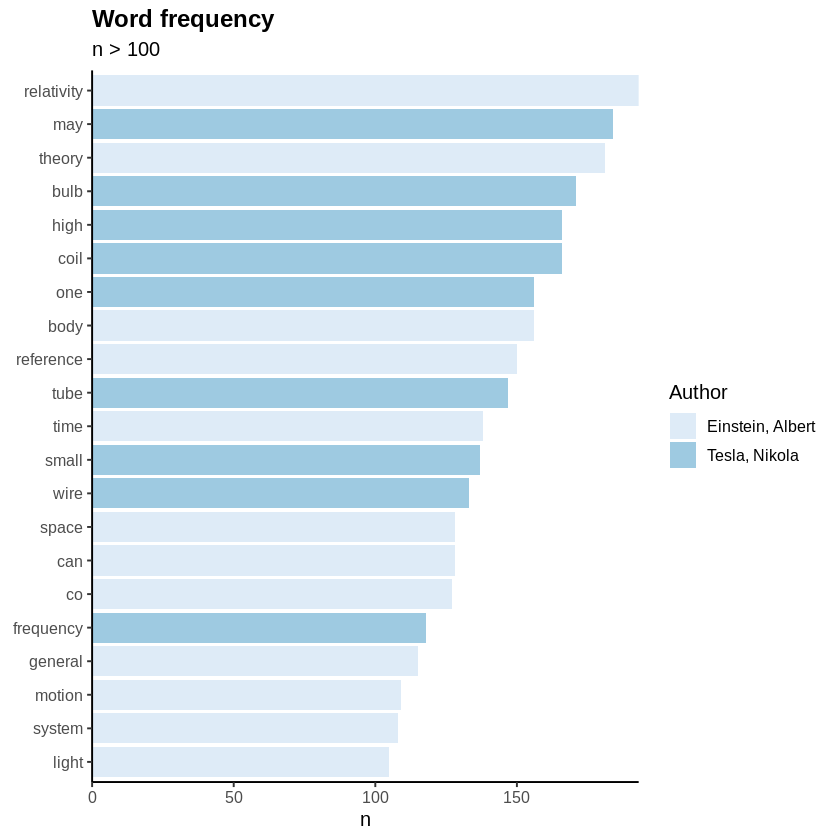

In [8]:
install.packages("ggplot2") # package for data visualization

library(dplyr)
library(ggplot2)

tb %>%
  count(author, word, sort = TRUE) %>%
  filter(n > 100) %>%
  mutate(word = reorder(word, n)) %>% # Reorder the word column based on word frequency (n) so that the words with the highest frequency appear at the top
  ggplot(aes(word, n)) +
  geom_col(aes(fill=author)) +
  xlab(NULL) +
  scale_y_continuous(expand = c(0, 0)) + # Adjust the y-axis limits with no expansion
  coord_flip() +
  theme_classic(base_size = 12) +
  labs(fill= "Author", title="Word frequency", subtitle="n > 100")+
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer() # Use Brewer color scales for the fill colors in the plot

Plot top 20 terms by author:

Selecting by n


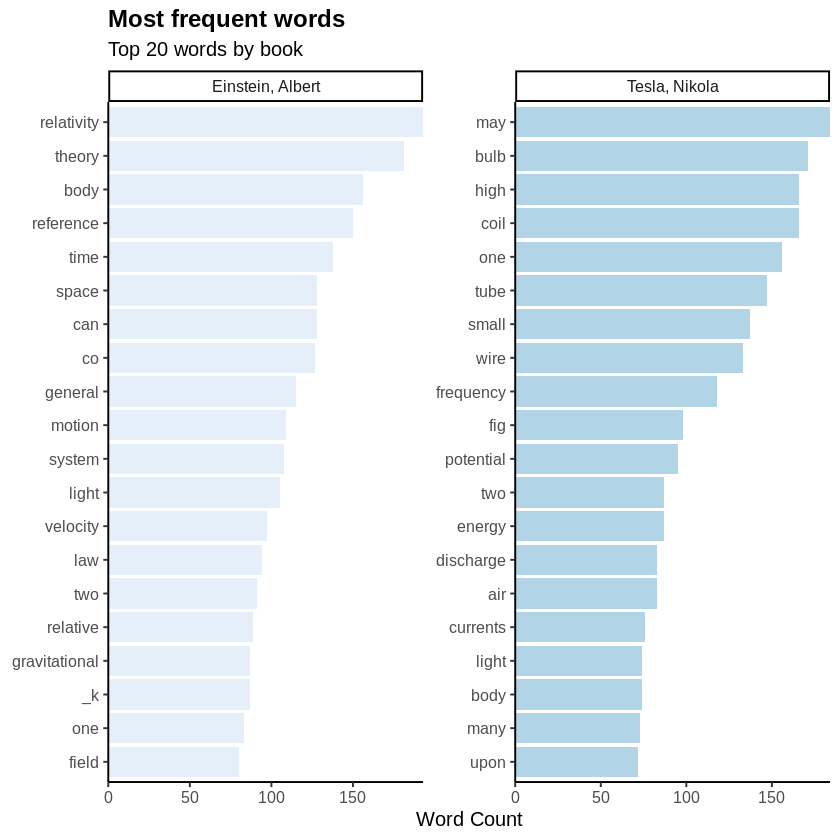

In [9]:
library(ggplot2)

tb %>%
  count(author, word, sort = TRUE) %>%
  group_by(author) %>%
  top_n(20) %>%
  ungroup() %>% # Remove the grouping, so the data is no longer grouped by author
  ggplot(aes(reorder_within(word, n, author), n,
    fill = author)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  scale_x_reordered() + # Scale the x-axis to match the reordered words within each author group
  coord_flip() +
  facet_wrap(~author, scales = "free") + # Facet the plot by author, allowing each author to have its own subplot with independent y-axis scales
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Most frequent words",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "Word Count")+
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

You may notice expressions like “_k”, “co” in the Einstein text and “fig” in the Tesla text

Let’s remove these and other less meaningful words with a custom list of stop words and use anti_join() to remove them

In [10]:
newstopwords <- tibble(word = c("eq", "co", "rc", "ac", "ak", "bn",
                                   "fig", "file", "cg", "cb", "cm",
                               "ab", "_k", "_k_", "_x"))

tb <- anti_join(tb, newstopwords, by = "word")
head(tb,n=20)

author,document,word
<chr>,<int>,<chr>
"Tesla, Nikola",1,experiments
"Tesla, Nikola",1,alternate
"Tesla, Nikola",1,currents
"Tesla, Nikola",1,high
"Tesla, Nikola",1,potential
"Tesla, Nikola",1,high
"Tesla, Nikola",1,frequency
"Tesla, Nikola",3,lecture
"Tesla, Nikola",3,electrical


Now we plot the data again without the new stopwords:

Selecting by n


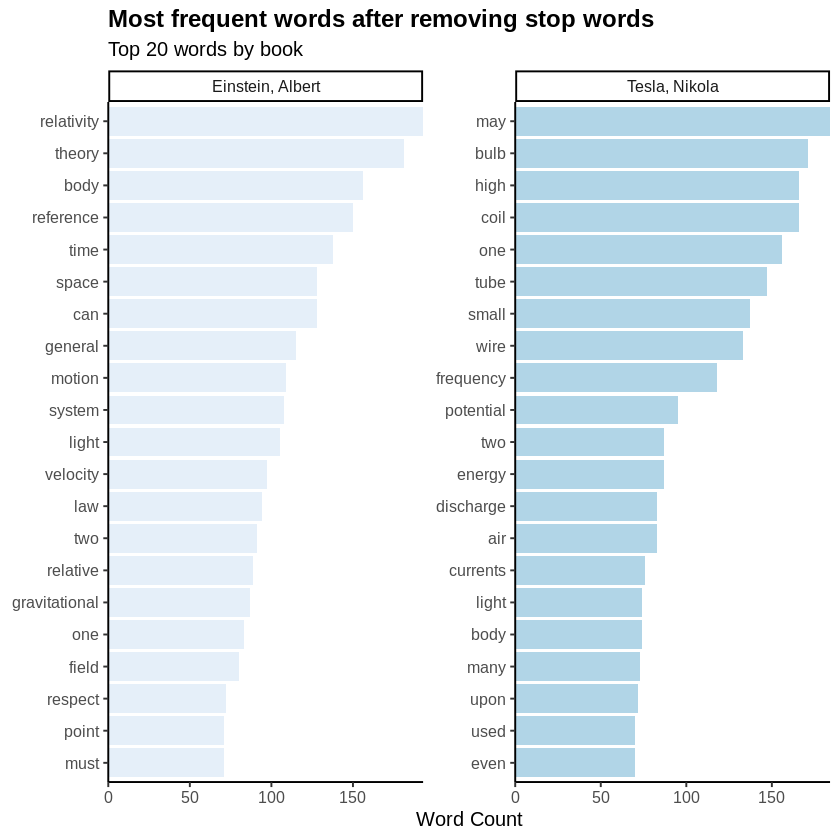

In [11]:
library(ggplot2)

tb %>%
  count(author, word, sort = TRUE) %>%
  group_by(author) %>%
  top_n(20) %>%
  ungroup() %>%
  ggplot(aes(reorder_within(word, n, author), n,
    fill = author)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  scale_x_reordered() +
  coord_flip() +
  facet_wrap(~author, scales = "free") +
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Most frequent words after removing stop words",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "Word Count")+
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

### 3.2 Term frequency and inverse document frequency (tf-idf)

Term frequency is a useful measure to determine how frequently a word occurs in a document

There are words in a document, however, that occur many times but may not be important

Another approach is to look at a term’s inverse document frequency (idf), which decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents

This can be combined with term frequency to calculate a term’s tf-idf (the two quantities multiplied together), the frequency of a term adjusted for how rarely it is used

The inverse document frequency for any given term is defined as: **How unique or rare the term is across a collection of documents. It helps to weigh down the importance of terms that occur very frequently in many documents (e.g., common words like “the,” “is”) and highlight terms that are more unique to specific documents**

Hence, term frequency and inverse document frequency allows us to find words that are characteristic for one document within a collection of documents

The tidytext package uses an implementation of tf-idf consistent with tidy data principles that enables us to see how different words are important in documents within a collection or corpus of documents

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



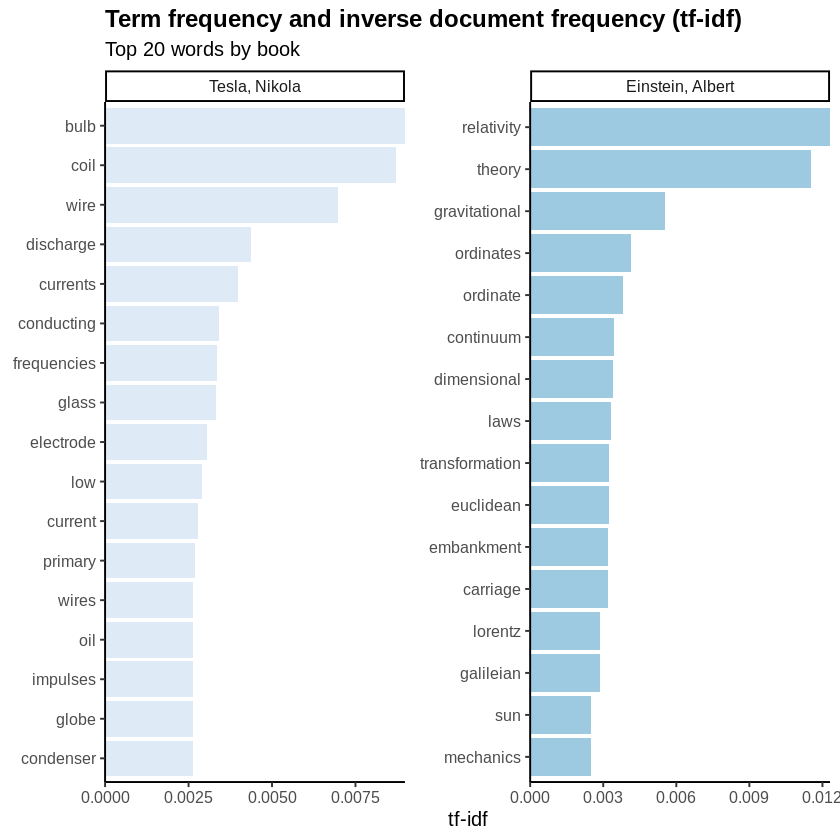

In [12]:
install.packages("forcats") # Used for manipulating and reordering factors

library(forcats)

plot_tb <- tb %>%
  count(author, word, sort = TRUE) %>%
  bind_tf_idf(word, author, n) %>% # Calculates the TF-IDF values for each word based on its frequency (n) within each author's documents
  mutate(word = fct_reorder(word, tf_idf)) %>% #Reorders the words within the factor word based on their TF-IDF values
  mutate(author = factor(author, # Converts the author variable to a factor with specific levels, ensuring that the order of authors in the plot is as specified
                         levels = c("Tesla, Nikola",
                                    "Einstein, Albert")))

plot_tb %>%
  group_by(author) %>%
  top_n(15, tf_idf) %>%
  ungroup() %>%
  mutate(word = reorder(word, tf_idf)) %>%
  ggplot(aes(word, tf_idf, fill = author)) +
  scale_y_continuous(expand = c(0, 0)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip() +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Term frequency and inverse document frequency (tf-idf)",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "tf-idf") +
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

In particular, the bind_tf_idf function in the tidytext package takes a tidy text dataset as input with one row per token (term), per document

One column (word here) contains the terms/tokens, one column contains the documents (authors in this case), and the last necessary column contains the counts, how many times each document contains each term (n in this example)



In [13]:
tf_idf <- tb %>%
  count(author, word, sort = TRUE) %>%
  bind_tf_idf(word, author, n) #Calculates the TF-IDF values for each word within each author's text based on the word frequency
                              # the author (document), and the total number of words (n) in each author's text
head(tf_idf,n=20)

author,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
"Einstein, Albert",relativity,193,0.017761826,0.6931472,0.012311560
"Tesla, Nikola",may,184,0.013943619,0.0000000,0.000000000
"Einstein, Albert",theory,181,0.016657464,0.6931472,0.011546074
"Tesla, Nikola",bulb,171,0.012958472,0.6931472,0.008982129
"Tesla, Nikola",coil,166,0.012579570,0.6931472,0.008719493
"Tesla, Nikola",high,166,0.012579570,0.0000000,0.000000000
"Einstein, Albert",body,156,0.014356709,0.0000000,0.000000000
"Tesla, Nikola",one,156,0.011821764,0.0000000,0.000000000
"Einstein, Albert",reference,150,0.013804528,0.0000000,0.000000000


Notice that idf and thus tf-idf are zero for extremely common words (like “may”)

These are all words that appear in both documents, so the idf term (which will then be the natural log of 1) is zero

The inverse document frequency (and thus tf-idf) is very low (near zero) for words that occur in many of the documents in a collection; this is how this approach decreases the weight for common words

The inverse document frequency will be a higher number for words that occur in fewer of the documents in the collection



### 3.3 Tokenizing by n-gram

We’ve been using the unnest_tokens function to tokenize by word, or sometimes by sentence, which is useful for the kinds of frequency analyses we’ve been doing so far

But we can also use the function to tokenize into consecutive sequences of words, called n-grams

By seeing how often word X is followed by word Y, we can then build a model of the relationships between them

In [14]:
library(dplyr)
library(tidytext)

einstein_bigrams <- books %>%
  filter(author == "Einstein, Albert") %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2) # create a new column named "bigram" to store the extracted bigrams
                            # The token parameter is set to "ngrams," and the n parameter is set to 2 to extract two-word phrases (bigrams)
head(einstein_bigrams,n=20)

author,document,bigram
<chr>,<int>,<chr>
"Einstein, Albert",3797,NA
"Einstein, Albert",3798,NA
"Einstein, Albert",3799,NA
"Einstein, Albert",3800,NA
"Einstein, Albert",3801,NA
"Einstein, Albert",3802,relativity the
"Einstein, Albert",3802,the special
"Einstein, Albert",3802,special and
"Einstein, Albert",3802,and general


We can examine the most common bigrams using dplyr’s count():

In [15]:
library(dplyr) # powerful package for data manipulation and transformation in R
library(tidytext) # an extension of tidyverse for handling and analyzing text data in a structured and tidy format

einstein_bigrams_count <- einstein_bigrams %>% #The %>% operator (pipe) is used to chain together multiple operations on the einstein_bigrams dataset
    count(bigram, sort = TRUE)
head(einstein_bigrams_count,n=20)

bigram,n
<chr>,<int>
NA,921
of the,613
to the,247
in the,197
of relativity,164
theory of,121
with the,119
on the,111
that the,110


Now we use tidyr’s separate(), which splits a column into multiple columns based on a delimiter

This lets us separate it into two columns, “word1” and “word2”, at which point we can remove cases where either is a stop-word

This time, we use the stopwords from the package tidyr:

In [16]:
library(tidyr)

# seperate words
bigrams_separated <- einstein_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ") # take the einstein_bigrams tibble (which contains bigrams) and separates each bigram into two columns, "word1" and "word2,"
                                                  # using a space as the separator. This is done to split each bigram into its individual words
# filter stop words and NA
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>% #remove bigrams where "word1" is a stop word (common words like "the," "and," etc.)
  filter(!word2 %in% stop_words$word) %>% #remove bigrams where "word2" is a stop word
  filter(!is.na(word1))                   #remove bigrams where "word1" is missing or empty

# new bigram counts:
bigram_counts <- bigrams_filtered %>%
  count(word1, word2, sort = TRUE)
head(bigram_counts,n=20)

word1,word2,n
<chr>,<chr>,<int>
reference,body,56
gravitational,field,53
special,theory,35
ordinate,system,34
space,time,27
classical,mechanics,26
lorentz,transformation,23
measuring,rods,22
straight,line,17


This one-bigram-per-row format is helpful for exploratory analyses of the text

As a simple example, we might be interested in the most often mentioned “theory”:

In [17]:
bigram_theory <- bigrams_filtered %>%
  filter(word2 == "theory") %>%
  count(word1, sort = TRUE)
head(bigram_theory,n=20)
# find the unigrams that are ranked by frequency, with the most common words that precede "theory" at the top

word1,n
<chr>,<int>
special,35
lorentz,4
newton’s,4
_special,1
comprehensive,1
electrodynamic,1
electromagnetic,1
newtonian,1
original,1


In other analyses you may be interested in the most common trigrams, which are consecutive sequences of 3 words. We can find this by setting n = 3:


In [18]:
trigram <- books %>%
  unnest_tokens(trigram, text, token = "ngrams", n = 3) %>% # use the unnest_tokens function from the tidytext package to tokenize the text in
                                                            # the text column of the books tibble into trigrams (sequences of three words)
                                                            # It specifies that the resulting trigrams should be stored in a column called trigram
                                                            # The n = 3 argument specifies that we want to extract trigrams

  separate(trigram, c("word1", "word2", "word3"), sep = " ") %>% # use the separate function from the tidyr package to split the trigram column into three separate columns:
                                                                # word1, word2, and word3. The sep = " " argument specifies that the separation should
                                                                # be done based on spaces between words

  filter(!word1 %in% stop_words$word,    # filter the trigrams to remove those where any of the three words (word1, word2, or word3)
         !word2 %in% stop_words$word,    # are stop words (common words like "the," "and," "in," etc., that are typically excluded in text analysis)
         !word3 %in% stop_words$word,    # and where word1 is not missing (!is.na(word1)). This filtering step helps remove noise and focus on meaningful trigrams
         !is.na(word1)) %>%
  count(word1, word2, word3, sort = TRUE)
head(trigram,n=20)

word1,word2,word3,n
<chr>,<chr>,<chr>,<int>
_x_1,_x_2,_x_3,12
light,_in,vacuo_,10
reference,body,_k_,10
space,time,continuum,9
_x_2,_x_3,_x_4,8
reference,body,_k,8
disruptive,discharge,coil,6
galileian,reference,body,6
ordinate,system,_k,5


###3.4 Network analysis
We may be interested in visualizing all of the relationships among words simultaneously, rather than just the top few at a time

As one common visualization, we can arrange the words into a network, or “graph.” Here we’ll be referring to a “graph” not in the sense of a visualization, but as a combination of connected nodes

A graph can be constructed from a tidy object since it has three variables:

1. from: the node an edge is coming from
2. to: the node an edge is going towards
3. weight: A numeric value associated with each edge

The igraph package has many functions for manipulating and analyzing networks

One way to create an igraph object from tidy data is the graph_from_data_frame() function, which takes a data frame of edges with columns for “from”, “to”, and edge attributes (in this case n):

In [20]:
install.packages("igraph") # used for creating and analyzing graphs

library(dplyr)
library(igraph)

# filter for only relatively common combinations
bigram_graph <- bigram_counts %>%
  filter(n > 5) %>%
  graph_from_data_frame()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




We use the ggraph package to convert the igraph object into a ggraph with the ggraph function, after which we add layers to it, much like layers are added in ggplot2

For example, for a basic graph we need to add three layers: nodes, edges, and text:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’




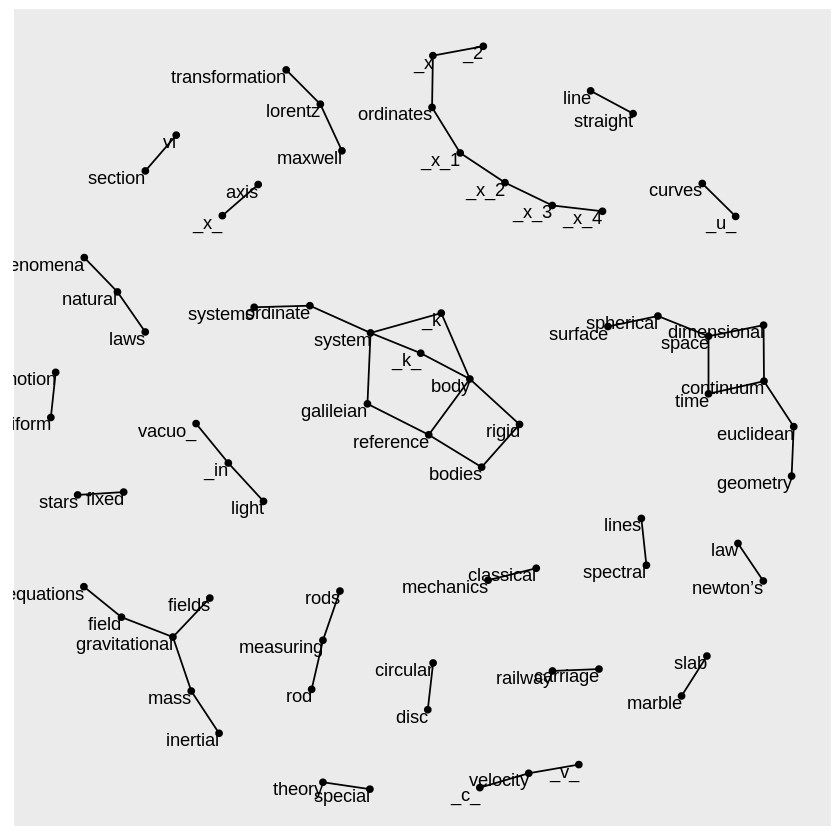

In [21]:
install.packages("ggraph") # library to visualize a graph created from bigram counts

library(ggraph)
set.seed(123)

ggraph(bigram_graph, layout = "fr") + # the layout algorithm "fr" (Fruchterman-Reingold layout) to determine the arrangement of nodes
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

Finally, we will change some settings to obtain to a better looking graph:

1. We add the edge_alpha aesthetic to the link layer to make links transparent based on how common or rare the bigram is.

2. We add directionality with an arrow, constructed using grid::arrow(), including an end_cap option that tells the arrow to end before touching the node.

3. We tinker with the options to the node layer to make the nodes more attractive (larger, blue points).

4. We add a theme that’s useful for plotting networks, theme_void().

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



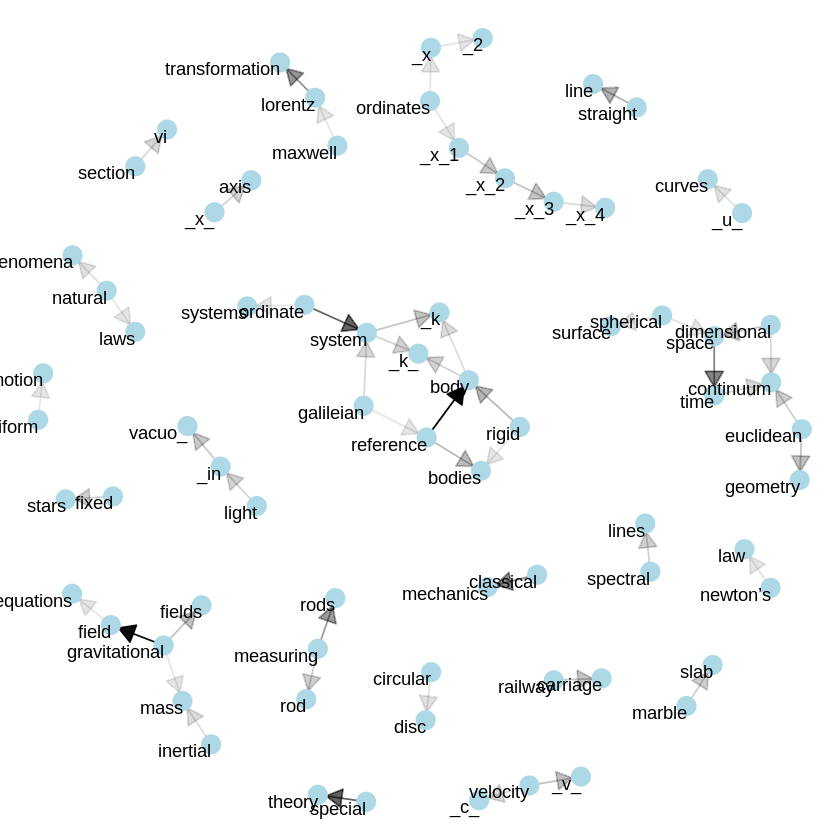

In [22]:
library(ggraph)
set.seed(123)

a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

## 4. Classification with logistic regression

In the first part we will build a statistical learning model. In the second part we will want to test it and assess its quality

Without dividing the dataset we would test the model on the data which the algorithm have already seen, which is why we start by splitting the data

### 4.1 Train test split
Let’s go back to the original books dataset (not the tidy_books dataset) because the lines of text are our individual observations

We could use functions from the rsample package to generate resampled datasets, but the specific modeling approach we’re going to use will do that for us so we only need a simple train/test split

In [23]:
install.packages("rsample") # provides functions for data splitting, resampling, and related tasks

library(rsample)

books_split <- books %>%
  select(document) %>%
  initial_split(prop = 3/4)

train_data <- training(books_split)
test_data <- testing(books_split)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’




Notice that we just select specific text rows (column document) for training and others for our test data (we set the proportion of data to be retained for modeling/analysis to 3/4) without selecting the actual text lines at this point

### 4.2 Training data (sparse matrix)
Now we want to transform our training data from a tidy data structure to a “sparse matrix” (these objects can be treated as though they were matrices, for example accessing particular rows and columns, but are stored in a more efficient format) to use for our classification algorithm

In [24]:
install.packages("tidytext")
library(tidytext)

sparse_words <- tidy_books %>%
  count(document, word) %>%
  inner_join(train_data, by = "document") %>% # filter the word counts to include only the documents in the training set

  cast_sparse(document, word, n) # the cast_sparse() function to convert the filtered word counts into a sparse matrix
                                 # This function takes the document, word, and count columns as arguments
                                 # The result is a sparse matrix where rows represent documents, columns represent unique words,
                                 # and each cell contains the count of that word in the respective document

dim(sparse_words) # check the dimensions of the sparse_words matrix and prints the number of rows and columns
                  # In the context of text analysis, this helps you understand the size of your data matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 4769  893

We have over 4,700 training observations and almost 900 features

Text feature space handled in this way is very high dimensional, so we need to take that into account when considering our modeling approach

One reason this overall approach is flexible is that you could at this point cbind() other columns, such as non-text numeric data, onto this sparse matrix

Then you can use this combination of text and non-text data as your predictors in the classifiaction algorithm, and the regularized regression algorithm we are going to use will find which are important for your problem space

### 4.3 Response variable
We also need to build a tibble with a response variable to associate each of the rownames() of the sparse matrix with an author, to use as the quantity we will predict in the model

In [25]:
word_rownames <- as.integer(rownames(sparse_words)) #retrieves the row names (document identifiers) from the sparse_words matrix using rownames(),
                                                    # and then converts them to integers using as.integer(). These will be used as document identifiers

books_joined <- tibble(document = word_rownames) %>% # creating a new tibble called books_joined, which contains a column named
                                                    # "document" with the document identifiers from the previous step

  left_join(books  %>%     # performing a left join with the books dataset, selecting only the "document" and "author" columns
                          # The join is based on the "document" column, and you are combining the information from both datasets
                         # This operation associates each document in the sparse_words matrix with its corresponding author
    select(document, author))
head(books_joined,n=20)

Joining with `by = join_by(document)`


document,author
<int>,<chr>
1,"Tesla, Nikola"
3,"Tesla, Nikola"
5,"Tesla, Nikola"
11,"Tesla, Nikola"
21,"Tesla, Nikola"
24,"Tesla, Nikola"
25,"Tesla, Nikola"
26,"Tesla, Nikola"
28,"Tesla, Nikola"


### 4.4 Logistic regression model
Now it’s time to train our classification model. Let’s use the glmnet package to fit a logistic regression model with lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) regularization

This regression analysis method performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces

Glmnet is a package that fits lasso models via penalized maximum likelihood. We do not cover the method and glmnet package in detail at this point, but if you want to learn more about glmnet and lasso regression, review the following resources:

1. [Introduction to glmnet](https://glmnet.stanford.edu/articles/glmnet.html)
2. [glmnet documentation](https://cran.r-project.org/web/packages/glmnet/glmnet.pdf)
3. [LASSO regression in Python](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Lasso.html)

The package is very useful for text classification because the variable selection that lasso regularization performs can tell you which words are important for your prediction problem

The glmnet package also supports parallel processing, so we can train on multiple cores with cross-validation on the training set using cv.glmnet().

In [26]:
install.packages("glmnet") # provides functions for fitting L1-regularized logistic regression models
install.packages("doMC") # provides parallelization support

library(glmnet)
library(doMC)

registerDoMC(cores = 8) # register a parallel backend with 8 cores using doMC
                        # This means that computations will be distributed across the specified number of CPU cores for parallel processing
is_einstein <- books_joined$author == "Einstein, Albert"
model <- cv.glmnet(sparse_words,
                   is_einstein,
                   family = "binomial",
                   parallel = TRUE,
                   keep = TRUE)
                   # create a binary vector is_einstein, where each element is TRUE if the corresponding document's author is "Einstein, Albert," and FALSE otherwise

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



Let’s use the package broom (the broom package takes the messy output of built-in functions in R, such as lm, nls, or t.test, and turns them into tidy data frames) to check out the coefficients of the model, for the largest value of lambda with error within 1 standard error of the minimum (lambda.1se)

In [35]:
install.packages("broom") # provides functions for tidying model outputs, such as coefficients

library(broom)

coefs <- model$glmnet.fit %>% # extract the internal glmnet object from the model
  tidy() %>% # function that tidies the coefficients of the model, making them easier to work with
  filter(lambda == model$lambda.1se) # filters the rows where the lambda value is equal to the optimal lambda determined by cross-validation
# This lambda value is typically chosen as the one with the best cross-validated performance

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Which coefficents are the largest in size, in each direction:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



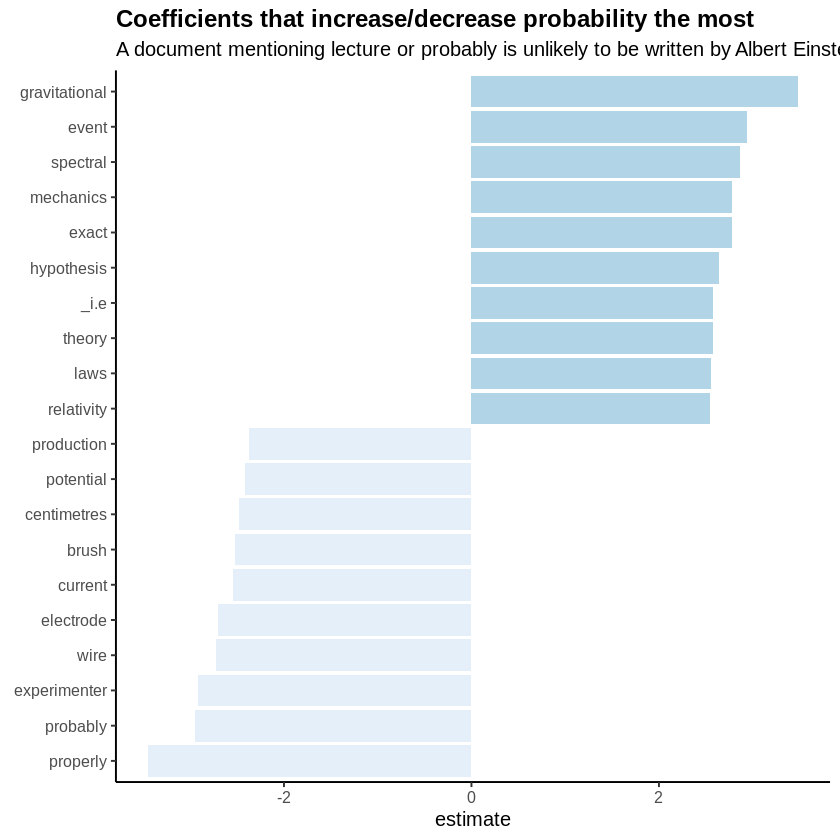

In [36]:
install.packages("forcats") # Used for working with factor variables in the visualization

library(forcats)

coefs %>%
  group_by(estimate > 0) %>% # group the coefficients into two categories based on whether the estimate is greater than 0 (increasing probability) or not
  top_n(10, abs(estimate)) %>% # select the top 10 coefficients with the largest absolute estimates within each group
  ungroup() %>%
  ggplot(aes(fct_reorder(term, estimate), estimate, fill = estimate > 0)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  coord_flip() +
  labs(
    x = NULL,
    title = "Coefficients that increase/decrease probability the most",
    subtitle = "A document mentioning lecture or probably is unlikely to be written by Albert Einstein"
  ) +
  theme_classic(base_size = 12) +
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

### 4.5 Model evaluation with test data
Now we want to evaluate how well this model is doing using the test data that we held out and did not use for training the model

Let’s create a dataframe that tells us, for each document in the test set, the probability of being written by Albert Einstein

In [37]:
intercept <- coefs %>%
  filter(term == "(Intercept)") %>% # extract the intercept (bias) term from the coefficients data frame, specifically rows where term is (intercept)
  pull(estimate)

classifications <- tidy_books %>%
  inner_join(test_data) %>% # join the tidy_books data frame with the test data based on the "document" column
  inner_join(coefs, by = c("word" = "term")) %>% # join the resulting data frame with the coefficients data frame
                                                # This connects each word in the document with its corresponding coefficient
  group_by(document) %>%
  summarize(score = sum(estimate)) %>% #calculate the total score for each document by summing the estimates for all the words in the document
  mutate(probability = plogis(intercept + score)) #calculates the probability of the document being written by Albert Einstein using the logistic function
                                                  # The intercept is added to the sum of scores, and the result is passed through the logistic function (the plogis function)
                                                 # This computes the probability
head(classifications,n=20)

Joining with `by = join_by(document)`


document,score,probability
<int>,<dbl>,<dbl>
7,-1.6569483,0.171537805
9,-0.5226801,0.391621988
27,-1.2047108,0.245542279
32,-1.0465089,0.276012461
36,-0.5824899,0.377468011
38,-0.1416163,0.485145479
40,-4.7306180,0.009485715
41,-3.1754936,0.043383935
42,-0.2087446,0.468401206


Now let’s use the yardstick package (yardstick is a package to estimate how well models are working using tidy data principles) to calculate some model performance metrics

For example, what does the ROC curve (receiver operating characteristic curve - a graph showing the performance of a classification model at all classification thresholds) look like:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



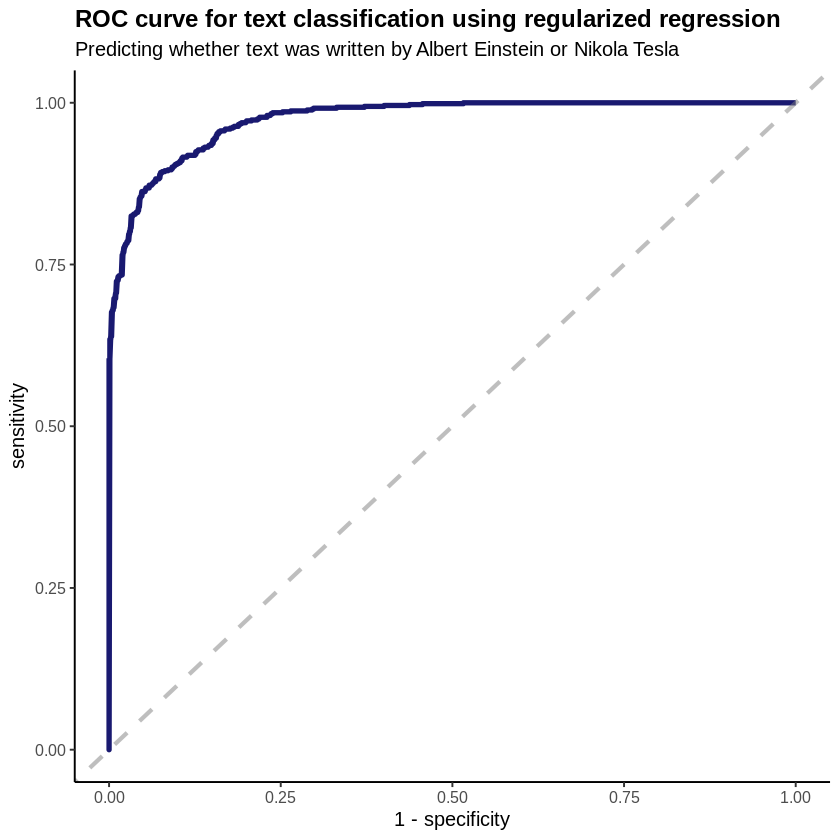

In [38]:
install.packages("yardstick") #helps with performance measurement and evaluation of models, particularly for supervised learning

library(yardstick)

comment_classes <- classifications %>% # process the classifications data frame to prepare it for ROC curve analysis
                                      # The operations include joining the data with the books data frame to get the actual author labels,
                                    # and converting the "author" column to a factor
  left_join(books %>%
    select(author, document), by = "document") %>%
  mutate(author = as.factor(author))

comment_classes %>% # calculate the ROC curve using the roc_curve function from the yardstick package
                    # This function takes the actual author labels ("author") and the predicted probabilities ("probability") as arguments
  roc_curve(author, probability) %>%
  ggplot(aes(x = 1 - specificity, y = sensitivity)) +
  geom_line(
    color = "midnightblue",
    size = 1.5
  ) +
  geom_abline(
    lty = 2, alpha = 0.5,
    color = "gray50",
    size = 1.2
  ) +
  labs(
    title = "ROC curve for text classification using regularized regression",
    subtitle = "Predicting whether text was written by Albert Einstein or Nikola Tesla"
  ) +
  theme_classic(base_size = 12) +
  theme(plot.title = element_text(lineheight=.8, face="bold"))

Let’s obtain the accuracy (AUC - the fraction of predictions that a classification model got right) on the test data:

In [39]:
auc <- comment_classes %>%
  roc_auc(author, probability) # compute the Area Under the Receiver Operating Characteristic Curve (ROC AUC), which is a performance metric for binary and multiclass classification models

Next we turn to the confusion matrix. Let’s make the following definitions:

1. “Einstein, Albert” is a positive class
2. “Tesla, Nikola” is a negative class

True Positive (TP):
1. Reality: Text is from Einstein
2. Model: Text is from Einstein

False Positive (FP):
1. Reality: Text is from Tesla
2. Model: Text is from Einstein

False Negative (FN):
1. Reality: Text is from Einstein
2. Model: Text is from Tesla

True Negative (TN):
1. Reality: Text is from Tesla
2. Model: Text is from Tesla

We can summarize our “einstein-text-prediction” model using a 2x2 confusion matrix that depicts all four possible outcomes:

1. A true positive is an outcome where the model correctly predicts the positive class (Einstein). Similarly, a true negative is an outcome where the model correctly predicts the negative class (Tesla).

2. A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

Let’s use a probability of 0.5 as our threshold. That means all model predictions with a probability greater than 50% get labeld as beeing text from Einstein:

In [40]:
comment_classes %>%
  mutate(prediction = case_when( # create a new variable called "prediction" using the mutate function
                                # It uses the case_when function to assign predicted labels based on a probability threshold of 0.5
                                # If the probability is greater than 0.5, it assigns "Einstein, Albert" as the prediction; otherwise, it assigns "Tesla, Nikola"
                                # The result is a new variable "prediction"

          probability > 0.5 ~ "Einstein, Albert",
          TRUE ~ "Tesla, Nikola"),
        prediction = as.factor(prediction)) %>% # convert the "prediction" variable to a factor data type using as.factor. Factors are used to represent categorical variables
  conf_mat(author, prediction) # calculate a confusion matrix using the conf_mat function
                              # It compares the actual author labels ("author") with the predicted labels ("prediction") to assess the model's performance

                  Truth
Prediction         Einstein, Albert Tesla, Nikola
  Einstein, Albert              646            82
  Tesla, Nikola                  68           757

Let’s take a closer look at these misclassifications: false negatives (FN) and false positives (FP)

Which documents here were incorrectly predicted to be written by Albert Einstein, at the extreme probability end of greater than 80% (false positive)?

In [41]:
# filter for False Positives (FP) by selecting documents where the model predicted
# "Tesla, Nikola" with a high probability (> 0.8) but the actual author is "Tesla, Nikola"

FP<- comment_classes %>%
  filter(probability > .8,
          author == "Tesla, Nikola") %>%
  sample_n(10) %>%
  inner_join(books %>%
  select(document, text)) %>%
  select(probability, text)
head(FP,n=20)

Joining with `by = join_by(document)`


probability,text
<dbl>,<chr>
0.8447254,"medium surely must exist, and I am convinced that, for instance, even"
0.9115352,"already described, except with the view of completing, or more clearly"
0.8963556,"brilliancy. Next, suppose we diminish to any degree we choose the"
0.8213111,shown by the following experiment:
0.8024522,"principle of the vacuum pump of the future. For the present, we must"
0.8592571,"From experiences of this kind I am led to infer that, in order to be"
0.8400526,"manner in which, in my opinion, a solution will be arrived at."
0.8991634,"there is any motion which is measurable going on in the space, such a"
0.8683090,"Think we as we may, of all the possible directions to develop a"


These documents were incorrectly predicted to be written by Albert Einstein. However, they were written by Nikola Tesla.

Finally, let’s take a look at the texts which are from Albert Einstein that the model did not correctly identify (false negative):

In [42]:
# filter for False Negatives (FN) by selecting documents where the model predicted "Tesla, Nikola"
# with a low probability (< 0.3) but the actual author is "Einstein, Albert"

FN <- comment_classes %>%
  filter(probability < .3,
         author == "Einstein, Albert") %>%
  sample_n(10) %>%
  inner_join(books %>%
  select(document, text)) %>%
  select(probability, text)
head(FN,n=20)

Joining with `by = join_by(document)`


probability,text
<dbl>,<chr>
0.25546359,even in a popular presentation of the subject.
0.24842960,"may indicate the distance (line-interval) between _P_ and _P′_, as"
0.06936744,high time that we remedy this defect; but I would mention at the
0.17533434,"so far, that up to the present we have been able to find only a few"
0.24470741,This conception is in itself not very satisfactory. It is still less
0.20327392,any doubt to arise as to the prime importance of the Galileian
0.04539193,bring some one a few happy hours of suggestive thought!
0.09167960,"strike you as being very singular, and for that reason I shall now draw"
0.17391199,"with such exactness in one domain of phenomena, and yet should be"


We can conclude that the model did a very good job in predicting the authors of the texts

Furthermore, the texts of the misclassifications are quite short and we can imagine, that even a human reader who is familiar with the work of Einstein and Tesla would have difficulties to classify them correctly